In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from datetime import datetime

##<- stands for items that need to be changed when changing files

In [2]:
#~~~~~~~~~~~~~~~~connecting folder to python
##folder path will need to be changed, duh
folder_path = r"G:\Shared drives\EGR-Mechanical and Nuclear Engineering-FAST Research Group\Projects\additive_manufacturing\5_resin_thermalconductivity\Data\Ethans Data\16May2023_ThermalConductivity_StainlessSteel_NotChanneled"

folder_contents = os.listdir(folder_path)
xlsx_files = []
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []
#~~~~~~~~~~~~~~~~~averaging statement
for file in folder_contents:
##will need to change the endswith and startswith when changing file
    if file.endswith(".xlsx") and file.startswith("16"):
        #print(":3")
        xlsx_files.append(os.path.join(folder_path, file))
for file in xlsx_files:
    #TC1-4
    df = pd.read_excel(file)
    ##will read_(whatever) will need to be changed depending on file type
    TC_1_4 = ["TC1","TC2","TC3","TC4"]
    ##will need to be changed depending on which thermocouple is the extra one
    TC_1_4_AVG = df[TC_1_4].mean()  
    AVG_Group_1 = TC_1_4_AVG.mean().round(3)
    TC_Group_1_AVG.append(AVG_Group_1)  

    #TC5-8
    TC_5_8 = ["TC5","TC6","TC7","TC8"]
    ##will need to be changed depending on which thermocouple is the extra one    
    TC_5_8_AVG = df[TC_5_8].mean()
    AVG_Group_2 = TC_5_8_AVG.mean().round(3)
    TC_Group_2_AVG.append(AVG_Group_2)

    #TC10-13
    TC_10_13 = ["TC10","TC11","TC12","TC13"]
    ##will need to be changed depending on which thermocouple is the extra one
    TC_10_13_AVG = df[TC_10_13].mean() 
    AVG_Group_3 = TC_10_13_AVG.mean().round(3)
    TC_Group_3_AVG.append(AVG_Group_3)

    #time???
    df['time_seconds'] = pd.to_datetime(df['Time']).dt.hour * 3600 + pd.to_datetime(df['Time']).dt.minute * 60# + pd.to_datetime(df['Time']).dt.second + pd.to_datetime(df['Time']).dt.microsecond *(1E-6)

    Lime = ['time_seconds']
    #Time = ['Time']
    Time = (Lime)
    Time_AVG = df[Time]
    AVG_Time = Time_AVG.mean()
    AVG_Time_Hour = (AVG_Time) * (1/3600)
    Time_Group.append(AVG_Time_Hour.to_list())
    #unneccesary rounding section that makes my code crash if I attempt to remove it, load bearing ig
    Time_Group_Round = []
    for x in Time_Group:
        Rounded = np.round(x,2)
        Time_Group_Round.append(Rounded)    
#~~~~~~~~~~~~~~~~~~ordering statment    
TC_Group_1_AVG.reverse()
TC_Group_2_AVG.reverse()
TC_Group_3_AVG.reverse()
Time_Group_Round.reverse()
##may need to be removed if future data starts off ordered from starting-> end
First = Time_Group_Round[0]
Time_From_0 = []
#neccessary rounding section
for x in Time_Group_Round:
    Blorb = x - First
    Zarp = np.round(Blorb,2)
    Time_From_0.append(Zarp)

#chart making section
data = {
    "Time" : Time_From_0,
    "G1Average" :  TC_Group_1_AVG,
    "G2Average" :  TC_Group_2_AVG,
    "G3Average" :  TC_Group_3_AVG
    }
df = pd.DataFrame(data)
df

,Time,G1Average,G2Average,G3Average
0,[0.0],22.641,22.543,12.315
1,[0.27],78.468,47.610,11.215
2,[1.04],81.510,72.247,19.423
3,[1.2],86.021,72.460,19.515
4,[1.37],85.342,74.116,19.820
5,[1.62],86.142,74.951,20.093
6,[1.83],86.598,75.440,19.965
7,[2.16],86.871,75.810,18.201
8,[2.41],86.902,75.813,18.164
9,[2.72],86.957,75.745,18.429


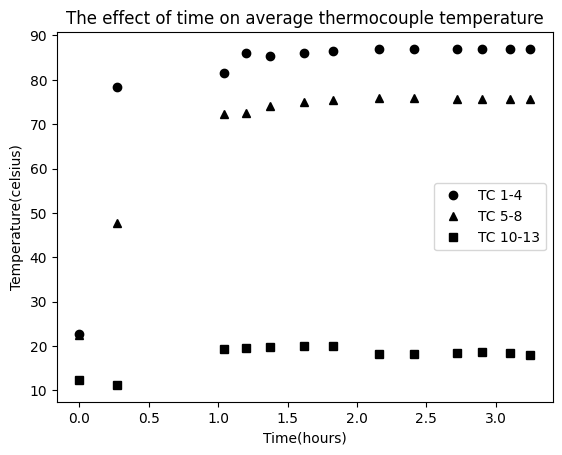

In [3]:
#varialable setup
y1 = df['G1Average']
y2 = df['G2Average']
y3 = df['G3Average']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()